In [2]:
import pdfplumber

In [8]:
with pdfplumber.open('nota07 - OK.pdf') as pdf:
    page = pdf.pages[0]
    all_text = ''
    text = page.extract_text()
    for row in text:
        all_text += text
    row = all_text.split('\n')

In [14]:
    linha1 = row[0].split()
    linha3 = row[3].split()
    obj_titulo = {
        "Plataforma": linha1[-1],
        "Data_de_extração": f"{linha1[0]} {linha1[1]}",
        "Tipo_de_Nota": row[1],
        "N_Nota": linha3[0],
        "Data_Pregão": linha3[1]
    }
    print(obj_titulo)

{'Plataforma': 'HomeBroker', 'Data_de_extração': '29/01/2023 22:12', 'Tipo_de_Nota': 'NOTAS DE CORRETAGEM', 'N_Nota': '15085', 'Data_Pregão': '06/04/2021'}


In [32]:
    linha4 = row[4].split()
    linha5 = row[5].split()
    cnpj_carta = row[6].split()
    endereco = row[8].split('EMAIL: santander.acoes@santander.com.br')
    email = row[8].split()
    
    obj_corretora = {
        "Nome_Corretora": f"{linha4[0]} {linha4[1]} {linha4[2]} {linha4[3]} {linha4[4]} {linha4[5]} {linha5[0]} {linha5[1]}",
        "Telefone_capitais_e_regiãoMetropolitana": f"{linha4[7]} {linha4[8]}",
        "Telefone_demais_localidades": f"{linha4[-3]} {linha4[-2]} {linha4[-1]}",
        "Telefone_pessoas_com_deficiencia_auditiva_e_fala": f"{linha5[5]} {linha5[6]} {linha5[7]}",
        "CNPJ": cnpj_carta[1],
        "Carta Patente": cnpj_carta[-1],
        "Endereço": f"{row[7]} {endereco[0]}",
        "EMAIL": email[-1]
    } 
    print(obj_corretora)

{'Nome_Corretora': 'SANTANDER CORRETORA DE CÂMBIO E VALORES MOBILIÁRIOS S.A', 'Telefone_capitais_e_regiãoMetropolitana': '4004 3535', 'Telefone_demais_localidades': '0800 702 3535', 'Telefone_pessoas_com_deficiencia_auditiva_e_fala': '0800 723 5007', 'CNPJ': '51.014.223/0001-49', 'Carta Patente': 'A-67/1859', 'Endereço': 'Av. Juscelino Kubitschek, 2041 / 2235 - 24° andar - Vila Nova Conceição São Paulo - SP CEP: 04543-011 ', 'EMAIL': 'santander.acoes@santander.com.br'}


In [65]:
    num_cliente = row[9].split()
    num_letra = 8
    cliente = ''
    while num_letra <= len(num_cliente[0]) - 1:
        cliente += f"{num_cliente[0][num_letra]}"
        num_letra += 1
    
    cliente_nome = ''
    num_total_nome = 1
    while num_total_nome <= len(num_cliente) - 1:
        cliente_nome += f"{num_cliente[num_total_nome]} "
        num_total_nome += 1
    
    complemento_nome = row[10].split('CPF/CNPJ/CVM/COB CÓDIGO CLIENTE')
    
    total_increment = 0
    dados_cliente = row[12].split()
    complemento_endereco_cliente = ''
    while total_increment <= len(dados_cliente) -3:
        complemento_endereco_cliente += f"{endereco_cliente[total_increment]} "
        total_increment += 1

    cep = row[13].split('CEP:')
    cidade = row[14].split('CIDADE:')
    
    obj_cliente = {
        "Numero do Cliente": cliente,
        "Nome do Cliente": f"{cliente_nome} {complemento_nome}",
        "Endereço": f"{row[11]} {complemento_endereco_cliente}",
        "CEP": cep[-1],
        "CIDADE": cidade[-1],
        "CPF_CNPJ_CVM_COB": dados_cliente[-2],
        "Código Cliente": dados_cliente[-1]
    }

['CLIENTE:603040', 'JEFFERSON', 'DA', 'SILVA']
JEFFERSON DA SILVA 
['AMARAL DE LIMA ', '']
ENDEREÇO:R CEZIRA TROMBETA SPEGLISH
10 RESIDENCIAL NOVA E 
['10', 'RESIDENCIAL', 'NOVA', 'E', '377.031.758-03', '603040-5']
['', '13275-650']
['', 'VALINHOS-SP']


{'Agente_de_Compensação': '', 'CLIENTE': '603040-5', 'Valor': '130,96', 'Custodiante': '', 'Banco_Agencia_Conta corrente': '033 / 4423 / 01024151', 'Acionista': '', 'Administrador': '', 'Complemento_Nome': ''}


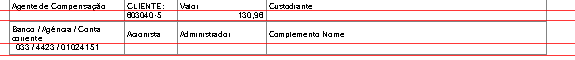

In [92]:
    coluna_banco = page.crop((20, 210, page.width, 270))
    
    banco_settings = {
        "vertical_strategy": "lines",
        "horizontal_strategy": "explicit",
        "explicit_horizontal_lines": [220, 230, 253, 265]
    }
    table_banco = coluna_banco.extract_table(banco_settings)
    
    obj_banco = {
        "Agente_de_Compensação": table_banco[0][0],
        "CLIENTE": table_banco[0][1],
        "Valor": table_banco[0][2],
        "Custodiante": table_banco[0][3],
        "Banco_Agencia_Conta corrente": table_banco[2][0],
        "Acionista": table_banco[2][1],
        "Administrador": table_banco[2][2],
        "Complemento_Nome": table_banco[2][3]
    }
    print(obj_banco)
im = coluna_banco.to_image()
im.draw_vlines([])
im.draw_hlines([220, 230, 253, 265])

{'negocio_1': {'Q': 'c', 'Negociacao': '1-BOVESPA', 'CV': 'C', 'Tipo_de_mercado': 'VISTA', 'Especificação_do_titulo': 'DEVA11 CI', 'Quantidade': '1', 'Preço_Ajuste': '117,87', 'Valor_Ajuste': '117,87', 'DC': 'D', 'Total': {'Especificação_do_Titulo': 'DEVA11 CI', 'Quantidade Total': '1', 'Preço Médio': '117,87'}}, 'negocio_2': {'Q': 'c', 'Negociacao': '1-BOVESPA', 'CV': 'V', 'Tipo_de_mercado': 'FRACIONARIO', 'Especificação_do_titulo': 'ELET3F ON N1', 'Quantidade': '10', 'Preço_Ajuste': '34,95', 'Valor_Ajuste': '349,50', 'DC': 'C', 'Total': {'Especificação_do_Titulo': 'ELET3F ON N1', 'Quantidade Total': '10', 'Preço Médio': '34,95'}}, 'negocio_3': {'Q': 'c', 'Negociacao': '1-BOVESPA', 'CV': 'C', 'Tipo_de_mercado': 'VISTA', 'Especificação_do_titulo': 'RBRY11 CI', 'Quantidade': '1', 'Preço_Ajuste': '106,57', 'Valor_Ajuste': '106,57', 'DC': 'D', 'Total': {'Especificação_do_Titulo': 'RBRY11 CI', 'Quantidade Total': '1', 'Preço Médio': '106,57'}}, 'negocio_4': {'Q': 'c', 'Negociacao': '1-BOVE

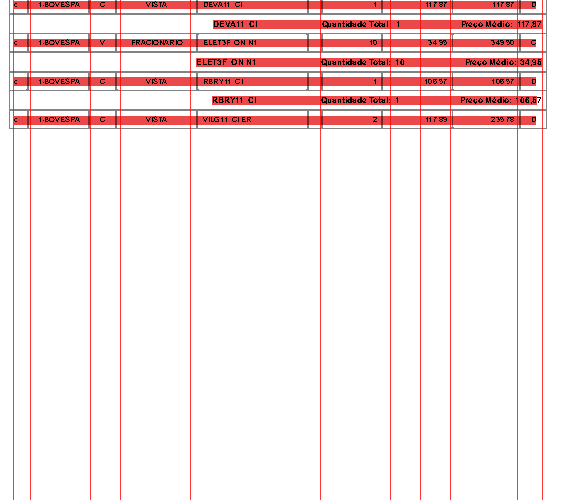

In [154]:
    coluna_negocios = page.crop((20, 310, page.width, 810))
    pagina = pdf.pages[1]
    all_text2 = ''
    texto = pagina.extract_text()
    for linha in texto:
        all_text2 += texto
    linha = all_text2.split('\n')
    
    negocios_settings = {
        "vertical_strategy": "explicit",
        "horizontal_strategy": "lines",
        "explicit_vertical_lines": [33, 50, 110, 140, 210, 340, 410, 440, 470, 537, 562]
    }
    table_negocios = coluna_negocios.extract_table(negocios_settings)
    
    quantidades = linha[2].split()
    num_negocio = 0
    numero_repeticao = 1
    total_negocios = {}
    while num_negocio <= len(table_negocios) -1:
        medio = num_negocio + 1
        
        if num_negocio == 6:
            negocio = {
                "Q": table_negocios[num_negocio][0],
                "Negociacao": table_negocios[num_negocio][1],
                "CV": table_negocios[num_negocio][2],
                "Tipo_de_mercado": table_negocios[num_negocio][3],
                "Especificação_do_titulo": table_negocios[num_negocio][4],
                "Quantidade": table_negocios[num_negocio][5],
                "Preço_Ajuste": table_negocios[num_negocio][7],
                "Valor_Ajuste": table_negocios[num_negocio][8],
                "DC": table_negocios[num_negocio][9],
                "Total": {
                    "Quantidade Total": quantidades[2],
                    "Preço Médio": quantidades[5]
                }
            }
        else:
            negocio = {
                "Q": table_negocios[num_negocio][0],
                "Negociacao": table_negocios[num_negocio][1],
                "CV": table_negocios[num_negocio][2],
                "Tipo_de_mercado": table_negocios[num_negocio][3],
                "Especificação_do_titulo": table_negocios[num_negocio][4],
                "Quantidade": table_negocios[num_negocio][5],
                "Preço_Ajuste": table_negocios[num_negocio][7],
                "Valor_Ajuste": table_negocios[num_negocio][8],
                "DC": table_negocios[num_negocio][9],
                "Total": {
                    "Especificação_do_Titulo": table_negocios[medio][4],
                    "Quantidade Total": table_negocios[medio][6],
                    "Preço Médio": table_negocios[medio][9]
                }
            }
       
        total_negocios[f"negocio_{numero_repeticao}"] = negocio
        num_negocio += 2
        numero_repeticao += 1
    print(total_negocios)
im = coluna_negocios.to_image()
im.draw_vlines([33, 50, 110, 140, 210, 340, 410, 440, 470, 537, 562])
im.draw_hlines([])

{'Vendas à vista': '349,50', 'Compras à vista': '460,22', 'Opções - Compras': '0,00', 'Opções - Vendas': '0,00', 'Operações a Termo': '0,00', 'Valor das Operações com Títulos Públicos (V. Nom.)': '0,00', 'Valor das Operações': '809,72'}


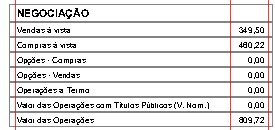

In [231]:
    coluna_negociacao = pagina.crop((20, 70, 295, 200))
    negociacao_settings = {
        "vertical_strategy": "explicit",
        "horizontal_strategy": "lines",
        "explicit_vertical_lines": [35, 250, 288]
    }
    table_negociacao = coluna_negociacao.extract_table(negociacao_settings)
    obj_negociacao = {
        table_negociacao[1][0]: table_negociacao[1][1],
        table_negociacao[2][0]: table_negociacao[2][1],
        table_negociacao[3][0]: table_negociacao[3][1],
        table_negociacao[4][0]: table_negociacao[4][1],
        table_negociacao[5][0]: table_negociacao[5][1],
        table_negociacao[6][0]: table_negociacao[6][1],
        table_negociacao[7][0]: table_negociacao[7][1]
    }
    print(obj_negociacao)
    
im = coluna_negociacao.to_image()
im.draw_vlines([35, 250, 288])
im.draw_hlines([])

{'Corretagem': {'Valor': '20,00', 'DC': 'D'}, 'ISS(são paulo)': {'Valor': '1,0 0', 'DC': ''}, 'I.R.R.F. s/ operações. Base R$349,50': {'Valor': '0,01', 'DC': ''}, 'Outras': {'Valor': '0,00', 'DC': 'D'}, 'Total Corretagem / Despesas': {'Valor': '20,00', 'DC': 'D'}, 'Líquido para: 08/04/2021': {'Valor': '130,96', 'DC': 'D'}}


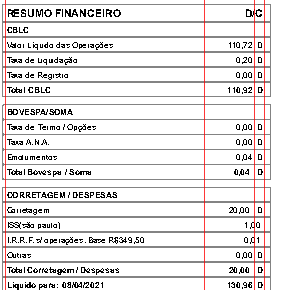

In [248]:
    coluna_resumo = pagina.crop((296, 70, page.width, 360))
    resumo_settings = {
        "vertical_strategy": "explicit",
        "horizontal_strategy": "lines",
        "explicit_vertical_lines": [301, 500, 550, 560]
    }
    table_resumo = coluna_resumo.extract_table(resumo_settings)
    resumo_financeiro = {
        "CBLC": {
            "Valor": table_resumo[1][-2],
            "DC": table_resumo[1][-1]
        },
        "Valor Líquido das Operacões": {
            "Valor": table_resumo[2][-2],
            "DC": table_resumo[2][-1]
        },
        "Taxa de Liquidação": {
            "Valor": table_resumo[3][-2],
            "DC": table_resumo[3][-1]
        },
        "Taxa de Registro": {
            "Valor": table_resumo[4][-2],
            "DC": table_resumo[4][-1]
        },
        "Total CBLC": {
            "Valor": table_resumo[5][-2],
            "DC": table_resumo[5][-1]
        }
    }
    
    obj_bovespa = {
        "Taxa de Termo_Opções": {
            "Valor": table_resumo[8][-2],
            "DC": table_resumo[8][-1]
        },
        "Taxa_ANA": {
            "Valor": table_resumo[9][-2],
            "DC": table_resumo[9][-1]
        },
        "Emolumentos": {
            "Valor": table_resumo[10][-2],
            "DC": table_resumo[10][-1]
        },
        "Total_Bovespa_Soma": {
            "Valor": table_resumo[11][-2],
            "DC": table_resumo[11][-1]
        }
    }

    obj_despesas = {
        table_resumo[14][0]: {
            "Valor": table_resumo[14][-2],
            "DC": table_resumo[14][-1]
        },
         table_resumo[15][0]: {
            "Valor": f"{table_resumo[15][-2]} {table_resumo[15][-1]}",
            "DC": ''
        },
         table_resumo[16][0]: {
            "Valor": f"{table_resumo[16][-2]}{table_resumo[16][-1]}",
            "DC": ''
        },
         table_resumo[17][0]: {
            "Valor": table_resumo[17][-2],
            "DC": table_resumo[17][-1]
        },
         table_resumo[18][0]: {
            "Valor": table_resumo[18][-2],
            "DC": table_resumo[18][-1]
        },
         table_resumo[19][0]: {
            "Valor": table_resumo[19][-2],
            "DC": table_resumo[19][-1]
        }
    }
    print(obj_despesas)
im = coluna_resumo.to_image()
im.draw_vlines([301, 500, 550, 560])
im.draw_hlines([])

{'Dados2': '2 - Corretora ou pessoa vinculada atuou na contra parte', 'Dados_Negocios': '# - Negócio direto', 'Dados8': '8 - Liquidação Institucional', 'Dados_D': 'D - Day-Trade', 'Dados_F': 'F - Cobertura', 'Dados_B': 'B - Debêntures', 'Dados_C': 'C - Clubes e Fundos de Ações', 'Dados_A': 'A - Posição Futuro', 'Dados_H': 'H - Home Broker', 'Dados_X': 'X - Box', 'Dados_P': 'P - Carteira Própria', 'Dados_Y': 'Y - Desmanche de Box', 'Dados_L': 'L - Precatório', 'Dados_T': 'T - Liquidação pelo Bruto'}


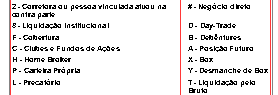

In [255]:
    coluna_obs = pagina.crop((20, 255, 298, 350))
    obs_settings = {
        "vertical_strategy": "explicit",
        "horizontal_strategy": "text",
        "explicit_vertical_lines": [30, 200, 290]
    }
    table_obs = coluna_obs.extract_table(obs_settings)
    
    obj_obs = {
        "Dados2": f"{table_obs[0][0]} {table_obs[1][0]}",
        "Dados_Negocios": table_obs[0][1],
        "Dados8": table_obs[3][0],
        "Dados_D": table_obs[3][1],
        "Dados_F": table_obs[5][0],
        "Dados_B": table_obs[5][1],
        "Dados_C": table_obs[7][0],
        "Dados_A": table_obs[7][1],
        "Dados_H": table_obs[9][0],
        "Dados_X": table_obs[9][1],
        "Dados_P": table_obs[11][0],
        "Dados_Y": table_obs[11][1],
        "Dados_L": table_obs[13][0],
        "Dados_T": f"{table_obs[13][1]} {table_obs[14][-1]}"
    }
    print(obj_obs)
    
im = coluna_obs.to_image()
im.draw_vlines([30, 200, 290])

In [279]:
    especificacao = linha[16].split()
    day_info = linha[-6].split('As operações a termo não são computadas no líquido da')
    print(day_info)
    info2 = linha[-6].split('DayTrade-IR 1% na Fonte')
    print(info2)
    print(linha[-5])
    obs = {
        "Especificações Diversas": {
            "IRRF_Day_Trade": especificacao[3],
            "Projeção": especificacao[-1]
        },
        "Informações Adicionais": {
            "info1": day_info[1],
            "info2": f"{info2[0]} {linha[-5]}",
            "info3": f"{linha[-4]} {linha[-3]} {linha[-2]}",
            "Site": linha[-1]
        }
    }
    print(obs)

['', ' DayTrade-IR 1% na Fonte']
['As operações a termo não são computadas no líquido da ', '']
fatura.
{'Especificações Diversas': {'IRRF_Day_Trade': '0,00', 'Projeção': 'R$0,00'}, 'Informações Adicionais': {'info1': ' DayTrade-IR 1% na Fonte', 'info2': 'As operações a termo não são computadas no líquido da  fatura.', 'info3': 'Custo Tributário nos termos da Lei nº 12.741/12 - PIS: 0,65% - COFINS: 4,00%, sendo isentas do PIS e da COFINS as receitas decorrentes da prestação de serviços a residentes no exterior que representem ingresso de divisas - ISS: de 2% a 5% a depender da alíquota aplicável no Município do estabelecimento prestador. Há contribuições previdenciárias indiretamente alocadas no preço dos serviços discriminados.', 'Site': 'https://www2.santandercorretora.com.br/S2/Default.aspx 2/2'}}
